IS 620 Project 2 
David Stern

For this assignment, I revisited the data I used in Project 1. This is a large two-node dataset of campaign contributions from residents of New York State to candidates in the 2016 Presidential election. There are only edges between the node sets and not within them.

I downloaded this data as a csv file from the most recent quarterly report on the website for the Federal Elections Commission. I then split the data into two csv files - one for nodes (all contributors and candidates, deduplicated) and one for edges (all campaign contributions).

In [27]:
import os
import csv
import networkx as nx
import matplotlib.pylab as plt
import math
from networkx.algorithms import bipartite as bi
%matplotlib inline

In [28]:
os.chdir('/Users/davidstern/Downloads/')

In [29]:
reader = csv.reader(open("NYedges.csv", 'rU'), dialect=csv.excel_tab)

In [30]:
G = nx.Graph()

In [31]:
politicians = []
for row in reader:
    row = row[0].split(',')
    contributor = row[0]
    politician = row[1]
    G.add_edge(contributor, politician)

In [32]:
print "Nodes: %d" %nx.number_of_nodes(G)
print "Edges: %d" %nx.number_of_edges(G)

Nodes: 6386
Edges: 6457


In [33]:
os.chdir('/Users/davidstern/GitHub/MSDA-Work/IS620')
reader2 = csv.reader(open("candidates.csv", 'rU'), dialect=csv.excel_tab)
reader3 = csv.reader(open("contributors.csv", 'rU'), dialect=csv.excel_tab)
candidates = []
contributors = []
for row in reader2:
    candidates.append(row)
for row in reader3:
    contributors.append(row)
candidates = [item for each in candidates for item in each]
contributors = [item for each in contributors for item in each]

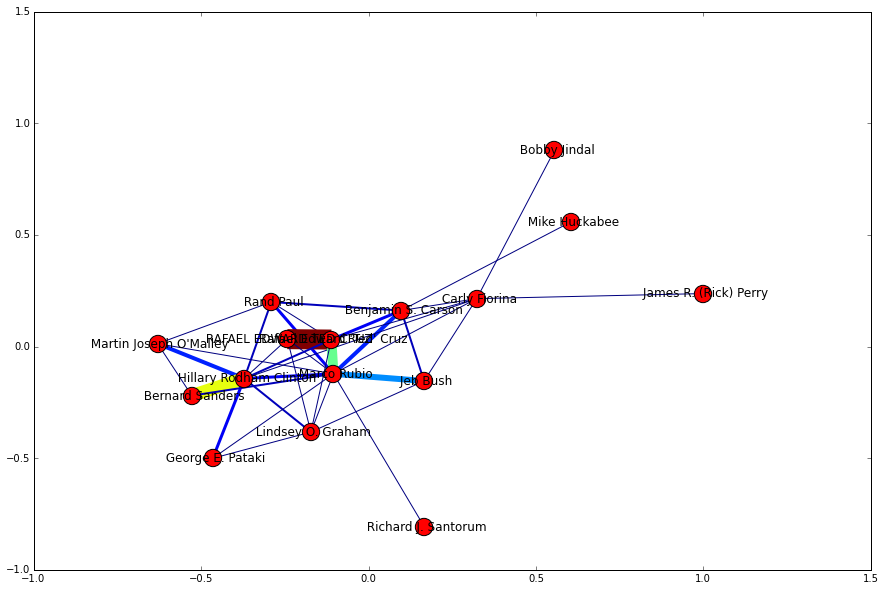

In [34]:
pols = bi.weighted_projected_graph(G, candidates, ratio=False) 
polWeights=[edata['weight'] for f,t,edata in pols.edges(data=True)] 
plt.figure(figsize = (15,10))
nx.draw_networkx(pols,width=polWeights, edge_color=polWeights)

In [ ]:
Now we will look at a histogram of weights to see how to best trim the 

(array([ 27.,   6.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  1. ,   2.9,   4.8,   6.7,   8.6,  10.5,  12.4,  14.3,  16.2,
         18.1,  20. ]),
 <a list of 10 Patch objects>)

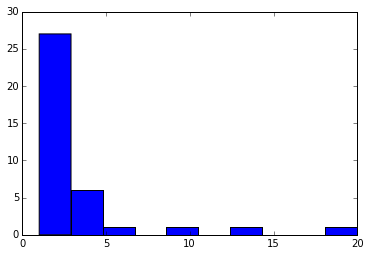

In [35]:
plt.hist(polWeights)

In [36]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

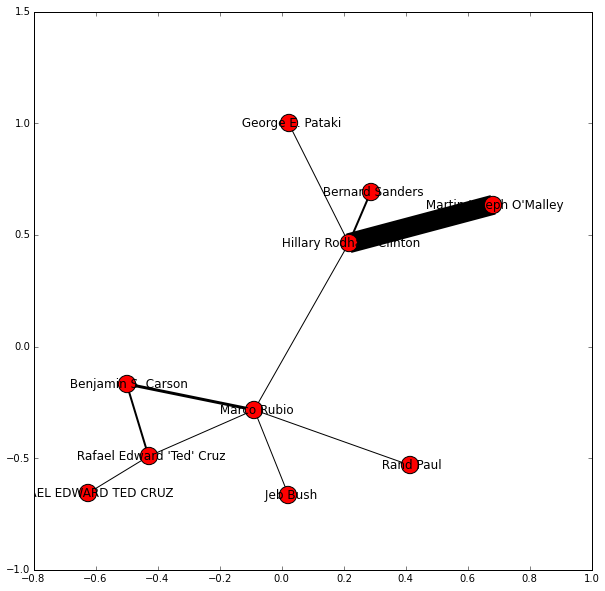

In [37]:
pols2 = trim_edges(pols, weight=2)
plt.figure(figsize = (10,10))
weights2 = [edata['weight'] for f,t,edata in pols2.edges(data=True)]
nx.draw_networkx(pols2, width=weights)